# Capstone 2 - Modeling
# Predicting Hospital Readmissions Within 30 Days

Goal: Develop a classification model to predict whether a patient will be readmitted within 30 days of discharge based on clinical and demographic data.

In [180]:
!pip install xgboost

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

# Loading and checking the data

In [185]:
#load the data
diabetic_data = pd.read_csv(r"C:\Users\aasha\Downloads\diabetic_data_cleaned.csv")

In [187]:
#checking the data to make sure it is wrangled and ready for modeling
diabetic_data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,5,6,25,1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,15,1,1,3,0,59,0,18,...,Up,No,No,No,No,No,Yes,Yes,>30,0
2,AfricanAmerican,Female,25,1,1,2,0,11,5,13,...,No,No,No,No,No,No,No,Yes,No,0
3,Caucasian,Male,35,1,1,2,0,44,1,16,...,Up,No,No,No,No,No,Yes,Yes,No,0
4,Caucasian,Male,45,1,1,1,0,51,0,8,...,Steady,No,No,No,No,No,Yes,Yes,No,0


In [189]:
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99493 entries, 0 to 99492
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99493 non-null  object
 1   gender                    99493 non-null  object
 2   age                       99493 non-null  int64 
 3   admission_type_id         99493 non-null  int64 
 4   discharge_disposition_id  99493 non-null  int64 
 5   time_in_hospital          99493 non-null  int64 
 6   medical_specialty         99493 non-null  object
 7   num_lab_procedures        99493 non-null  int64 
 8   num_procedures            99493 non-null  int64 
 9   num_medications           99493 non-null  int64 
 10  number_outpatient         99493 non-null  int64 
 11  number_emergency          99493 non-null  int64 
 12  number_inpatient          99493 non-null  int64 
 13  diag_1                    99493 non-null  object
 14  diag_2                

In [191]:
#drop identifiers and target
X = diabetic_data.drop(columns=['readmitted_binary'])
y = diabetic_data['readmitted_binary']                       

## Data Preprocessing
To prepare this dataset we have imputed the missing values, scaled numerical features, and applied one hot encoding to categorical features..


In [194]:
#using the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

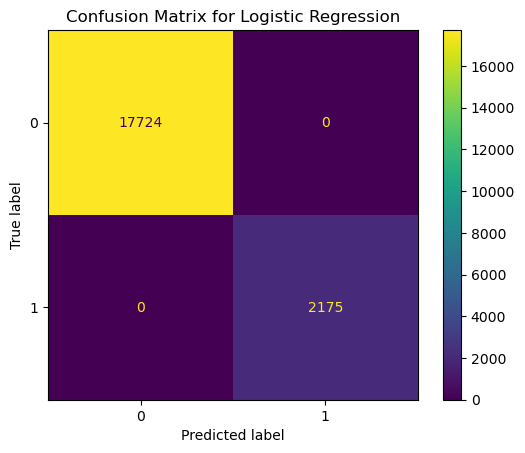

In [196]:
#after model.fit and model.predict calls
#confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

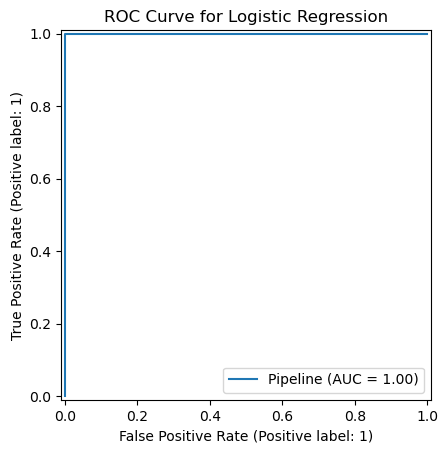

In [198]:
#roc curve
roc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')
plt.show()

In [130]:
#separate column types

num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

#create preprocessing pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features)
])


In [147]:
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [135]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [137]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17724
           1       1.00      1.00      1.00      2175

    accuracy                           1.00     19899
   macro avg       1.00      1.00      1.00     19899
weighted avg       1.00      1.00      1.00     19899

Confusion Matrix:
[[17724     0]
 [    0  2175]]
ROC AUC Score: 1.0

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17724
           1       1.00      1.00      1.00      2175

    accuracy                           1.00     19899
   macro avg       1.00      1.00      1.00     19899
weighted avg       1.00      1.00      1.00     19899

Confusion Matrix:
[[17724     0]
 [    0  2175]]
ROC AUC Score: 1.0

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17724
           1     

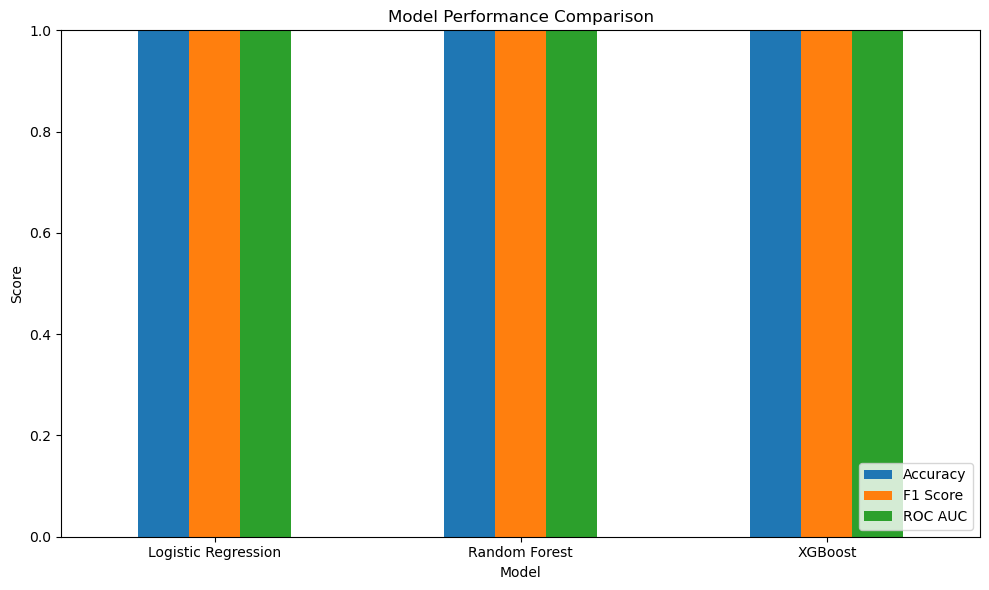

In [172]:
# After collecting metrics for all models (accuracy, f1, roc_auc)
model_names = []
accuracies = []
f1_scores = []
roc_aucs = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Print classification report
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

    # Save metrics
    model_names.append(name)
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, y_proba))

# Create DataFrame for visualization
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
})

# Plotting
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()